In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [18]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [6]:
pip show ultralytics

Name: ultralytics
Version: 8.0.196
Summary: Ultralytics YOLOv8 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://github.com/ultralytics/ultralytics
Author: Ultralytics
Author-email: hello@ultralytics.com
License: AGPL-3.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, thop, torch, torchvision, tqdm
Required-by: 


In [7]:
from ultralytics import YOLO

In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ciB9ilmgKfozUgtDaRFP")
project = rf.workspace("my-work-rojis").project("object-detection-9vlol")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-detection-1 in yolov8:: 100%|██████████| 9496/9496 [00:01<00:00, 6333.37it/s]


In [12]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=/content/Object-detection-1/data.yaml epochs=70 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.2.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Object-detection-1/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False

In [19]:
!ls {HOME}/runs/detect/train/

args.yaml					    labels.jpg	      train_batch2.jpg
events.out.tfevents.1716564257.2d4441c6057b.1845.0  train_batch0.jpg  weights
labels_correlogram.jpg				    train_batch1.jpg


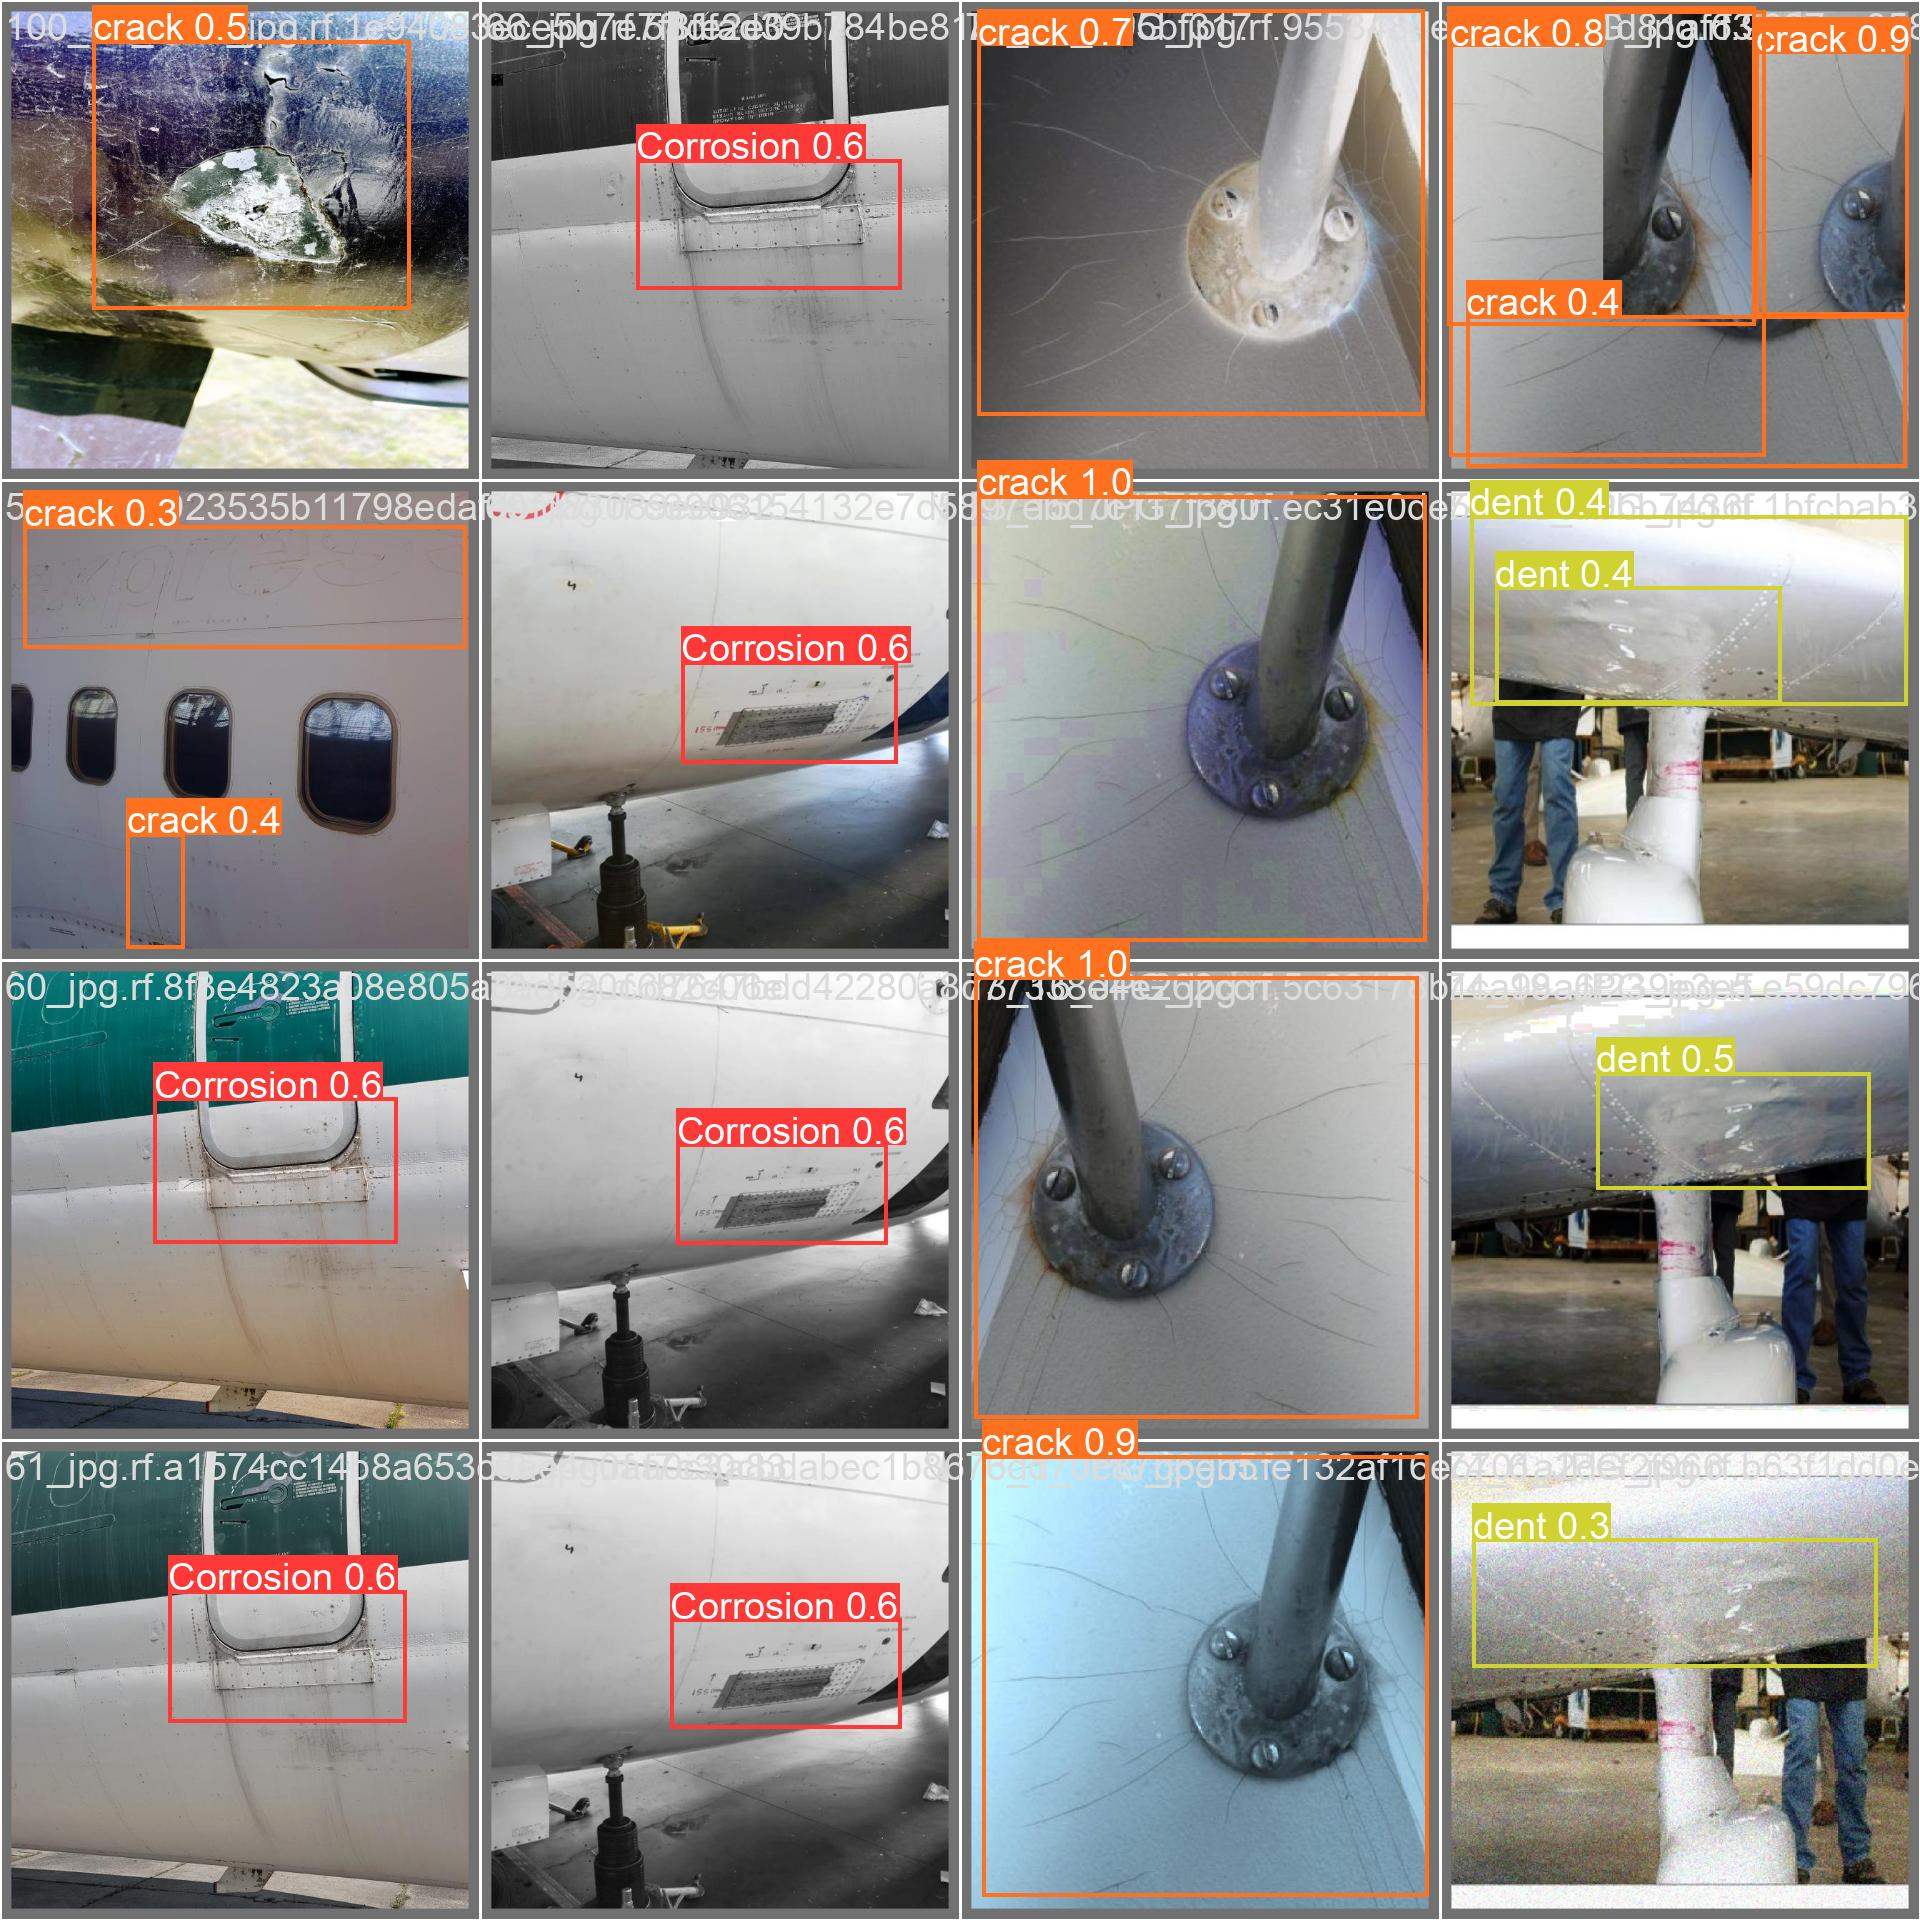

In [22]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train3/val_batch0_pred.jpg',width=600)

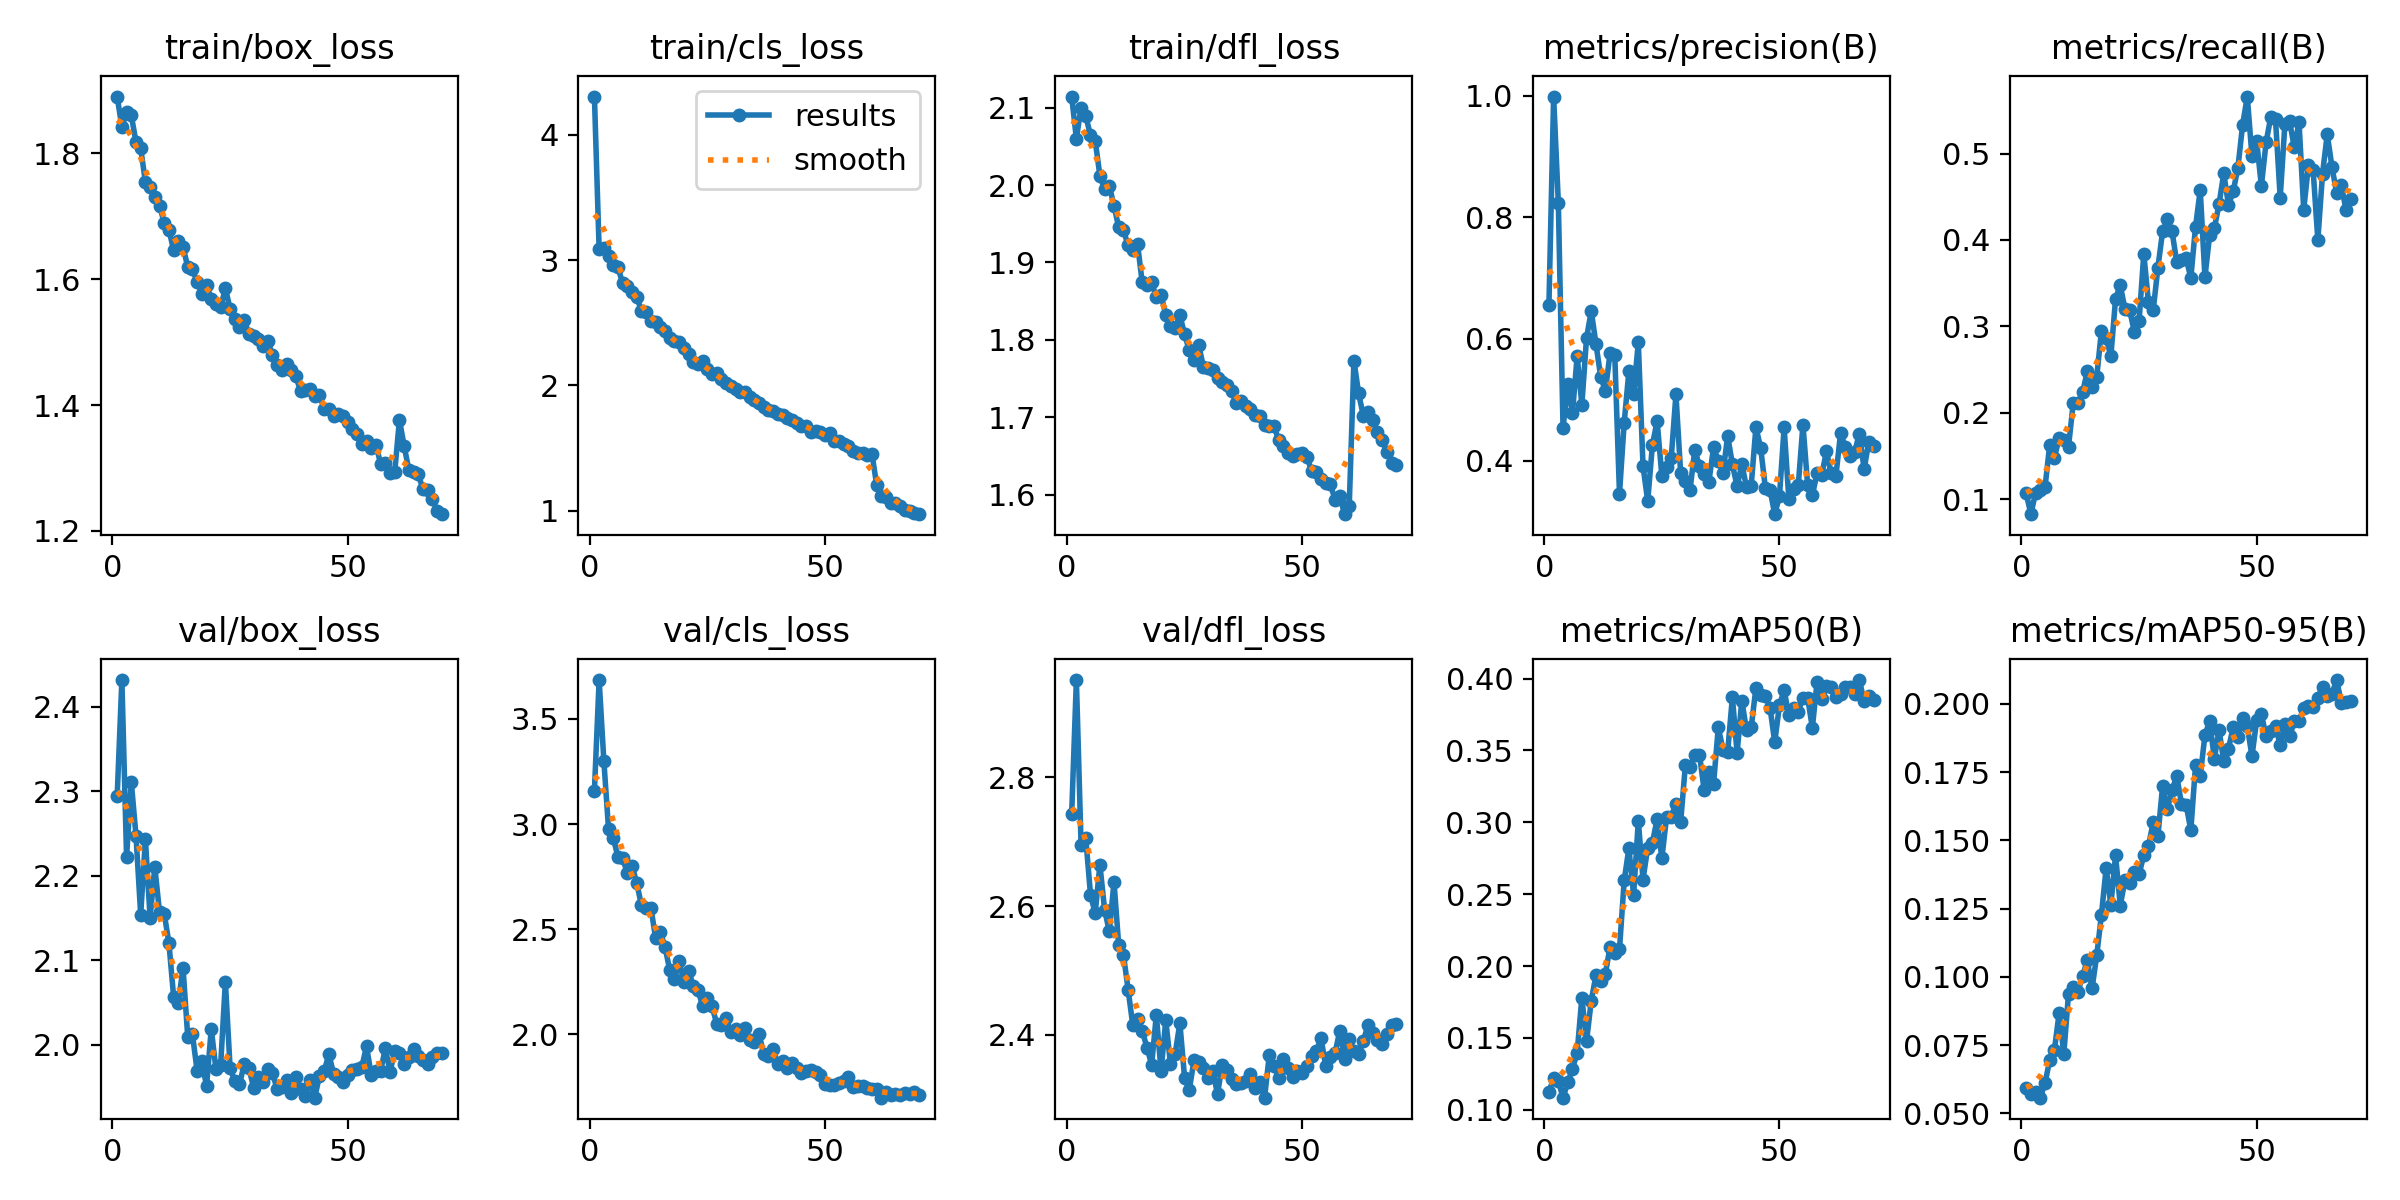

In [23]:
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train3/results.png',width=600)

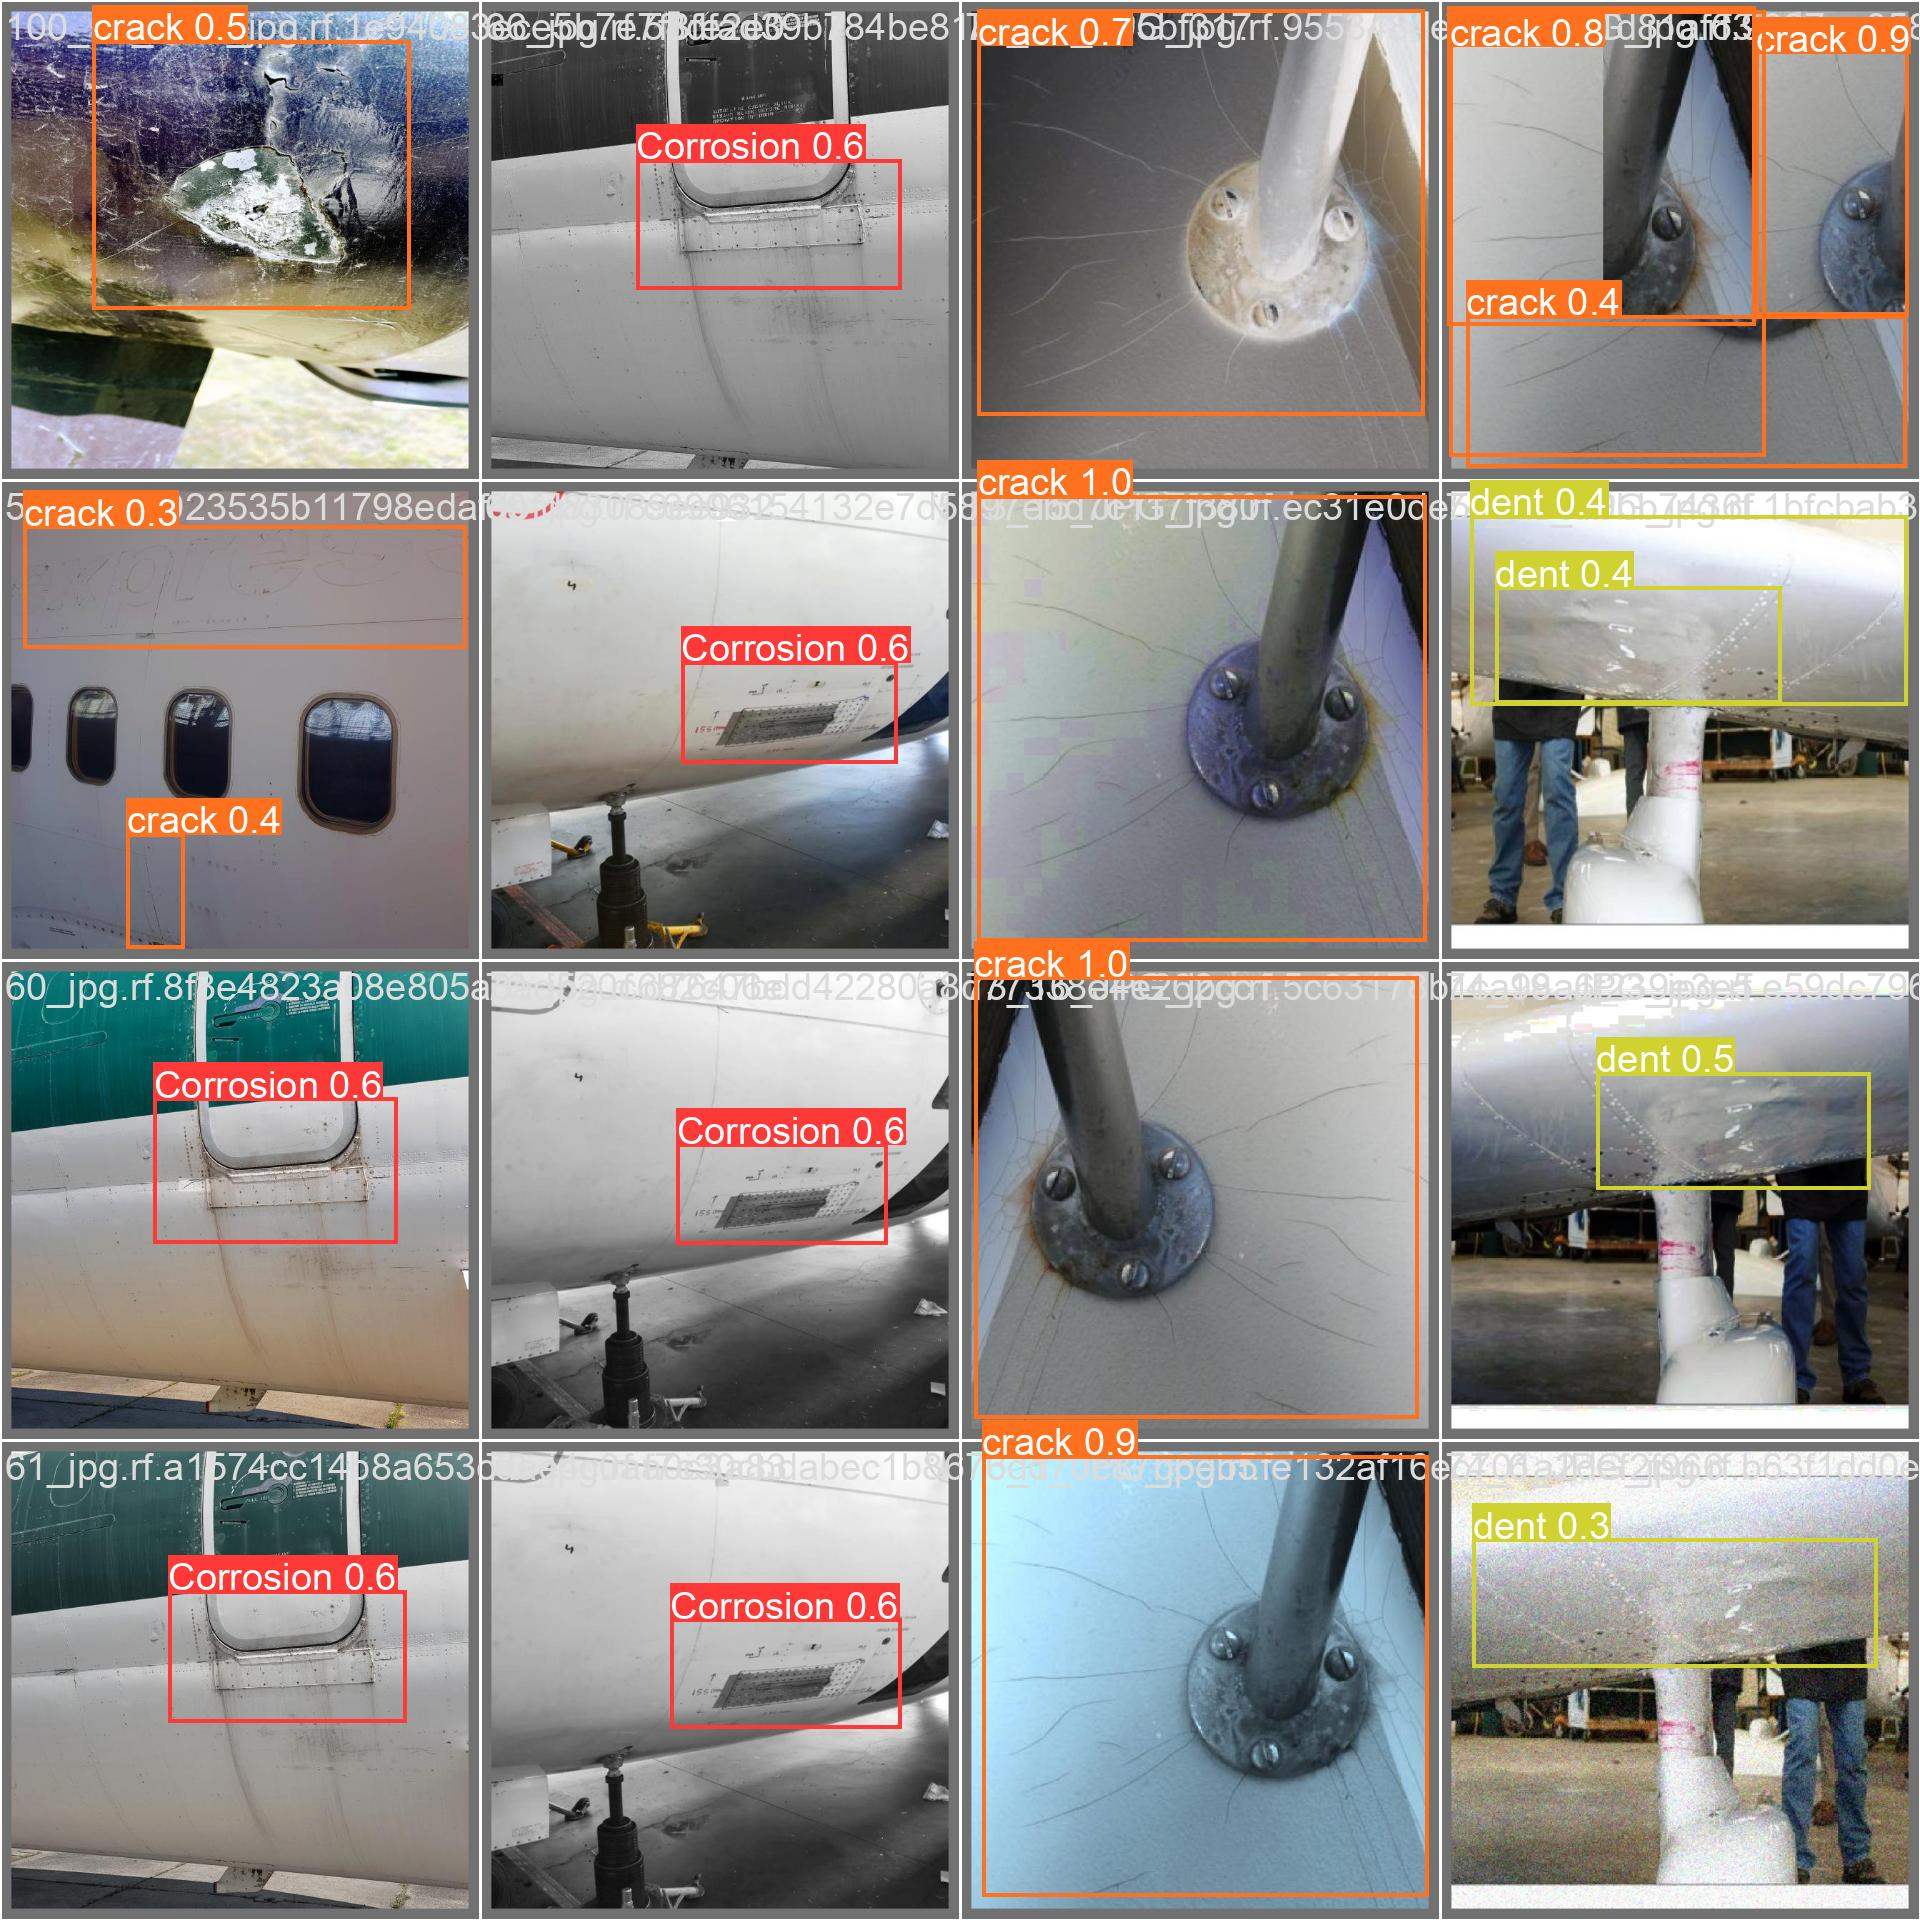

In [24]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train3/val_batch0_pred.jpg',width=600)

In [26]:
# Validate custom model
!yolo task=detect \
mode=val \
model={HOME}/runs/detect/train3/weights/best.pt \
data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Object-detection-1/valid/labels.cache... 947 images, 1 backgrounds, 0 corrupt: 100% 947/947 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 1013. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 60/60 [00:17<00:00,  3.42it/s]
                   all        947       1013      0.445      0.453      0.398      0.209
             Corrosion        947         89      0.402      0.416      0.316      0.104
corrsion-surface-wearout        947          6      0.241      0.333      0.236      0.121
                 crack        94

In [28]:
# custom data
!yolo task=detect \
mode=predict \
model={HOME}/runs/detect/train3/weights/best.pt \
conf=0.25 \
source={dataset.location}/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

image 1/481 /content/Object-detection-1/test/images/100_7_JPG_jpg.rf.fd353db75af0ff7d5e0170c94ce794f1.jpg: 640x640 1 crack, 16.4ms
image 2/481 /content/Object-detection-1/test/images/100_jpg.rf.067035efda0ba1494243cef3740d2506.jpg: 640x640 1 crack, 1 crack-dent, 16.4ms
image 3/481 /content/Object-detection-1/test/images/101_17_JPG_jpg.rf.f92fdec415d95b8d7921cd7f841f35ff.jpg: 640x640 1 Corrosion, 1 surface wear, 16.3ms
image 4/481 /content/Object-detection-1/test/images/101_19_JPG_jpg.rf.b999081bb088d7a4323b8d3c6a121c88.jpg: 640x640 1 Corrosion, 1 surface wear, 16.3ms
image 5/481 /content/Object-detection-1/test/images/101_23_JPG_jpg.rf.5bd45ba4c2e78b6dea1e80de89d272e4.jpg: 640x640 1 Corrosion, 1 surface wear, 16.3ms
image 6/481 /content/Object-detection-1/test/images/101_4_JPG_jpg.rf.84b06655899e2b85f0567d4e46554ad2.jp

In [29]:
import glob
from IPython.display import Image, display



for img_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:1]:
    display(Image(filename=img_path, width=600))
    print("\n")

In [30]:
!yolo task=detect \
mode=predict \
model={HOME}/runs/detect/train3/weights/best.pt \
conf=0.25 \
source='https://videos.pexels.com/video-files/853941/853941-hd_1920_1080_30fps.mp4'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

100% 3.12M/3.12M [00:00<00:00, 35.8MB/s]
video 1/1 (1/406) /content/853941-hd_1920_1080_30fps.mp4: 384x640 (no detections), 107.3ms
video 1/1 (2/406) /content/853941-hd_1920_1080_30fps.mp4: 384x640 (no detections), 10.8ms
video 1/1 (3/406) /content/853941-hd_1920_1080_30fps.mp4: 384x640 (no detections), 11.0ms
video 1/1 (4/406) /content/853941-hd_1920_1080_30fps.mp4: 384x640 (no detections), 11.4ms
video 1/1 (5/406) /content/853941-hd_1920_1080_30fps.mp4: 384x640 (no detections), 11.2ms
video 1/1 (6/406) /content/853941-hd_1920_1080_30fps.mp4: 384x640 (no detections), 12.0ms
video 1/1 (7/406) /content/853941-hd_1920_1080_30fps.mp4: 384x640 (no detections), 10.8ms
video 1/1 (8/406) /content/853941-hd_1920_1080_30fps.mp4: 384x640 (no detections), 10.9ms
video 1/1 (9/406) /content/853941-hd_1920_1080_30fps.mp4: 384x640 (n

In [35]:
# custom data
!yolo task=detect \
mode=predict \
model={HOME}/runs/detect/train3/weights/best.pt \
conf=0.25 \
source=/content/Vauriokorjattavakone.png

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/Vauriokorjattavakone.png: 320x640 (no detections), 108.2ms
Speed: 11.7ms preprocess, 108.2ms inference, 40.1ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


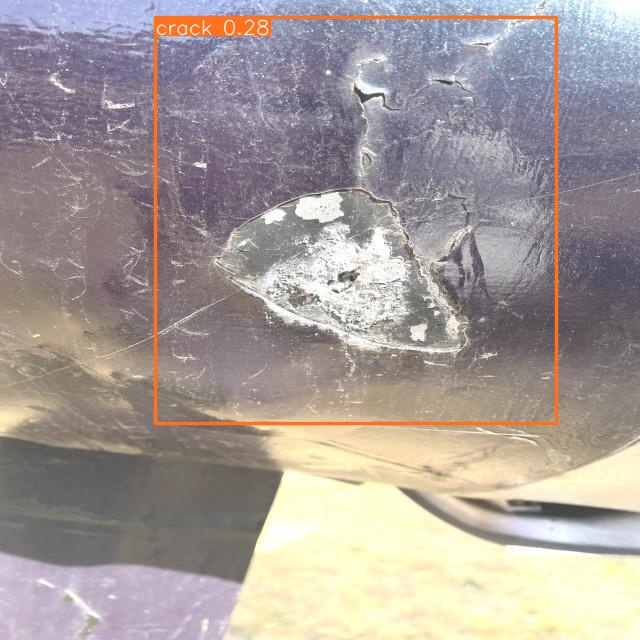

In [34]:
from IPython.display import Image
Image(filename ='/content/runs/detect/predict/100_7_JPG_jpg.rf.fd353db75af0ff7d5e0170c94ce794f1.jpg', height=600)

In [38]:
import shutil
shutil.make_archive('/content/runs', 'zip', '/content/runs')

'/content/runs.zip'

In [39]:
from google.colab import files
files.download('/content/runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>